In [7]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import numpy.linalg as lng
import matplotlib.pyplot as plt

database = pd.read_csv('db_sprint2.csv')

print(database)


    nombre  caracteristica1  caracteristica2  caracteristica3  \
0     Juan              0.1              0.9              0.8   
1     Jose              0.2              0.3              0.6   
2    Pablo              0.3              0.4              0.5   
3  Antonio              0.5              0.2              0.8   
4  Daniela              0.1              0.6              0.3   
5    Sofia              0.3              0.4              0.6   
6  Valeria              0.5              0.7              0.7   

   caracteristica4  caracteristica5  
0              0.1              0.8  
1              0.3              0.4  
2              0.4              0.8  
3              0.6              0.4  
4              0.3              0.7  
5              0.6              0.3  
6              0.2              0.2  


In [ ]:
dropdownName1 = widgets.Dropdown(
    options = database['nombre'],
    value = database['nombre'][0],
    description = 'nombre:',
)
dropdownName1

Dropdown(description='nombre:', options=('Juan', 'Jose', 'Pablo', 'Antonio', 'Daniela', 'Sofia', 'Valeria'), v…

In [ ]:
dropdownName2 = widgets.Dropdown(
    options = database['nombre'],
    value = database['nombre'][0],
    description = 'nombre:',
)
dropdownName2

Dropdown(description='nombre:', options=('Juan', 'Jose', 'Pablo', 'Antonio', 'Daniela', 'Sofia', 'Valeria'), v…

In [ ]:
def cos_sim (a,b): 

  #Obtener valores del nombre seleccionado y convertir a un arreglo
  name1 = database.loc[database['nombre']== a].values 
  name2 = database.loc[database['nombre']== b].values
  
  # Borramos el nombre
  name1 = np.delete(name1,0) 
  name2 = np.delete(name2,0) 

  #Calcular la relacion de coseno entre A y B
  cos_sim = np.dot(name1, name2)/(lng.norm(name1)*lng.norm(name2)) 
  print ('La relación coseno entre: ' + a + ' y ' + b)
  print(cos_sim)

def button_clicked(b):
  cos_sim(dropdownName1.value, dropdownName2.value);

#Crear botón
button = widgets.Button( 
    description='Click me',
    disabled= False,

    # 'success', 'info', 'warning', 'danger' or ''
    button_style='', 
    tooltip='Click me',

    # (FontAwesome names without the `fa-` prefix)
    icon='check' 
)
button.on_click(button_clicked) 
button

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

La relación coseno entre: Juan y Juan
1.0000000000000002
La relación coseno entre: Juan y Antonio
0.7146358257588836


In [8]:
dropdownName3 = widgets.Dropdown(
    options = database['nombre'],
    value = database['nombre'][0],
    description = 'nombre:',
)
dropdownName3

Dropdown(description='nombre:', options=('Juan', 'Jose', 'Pablo', 'Antonio', 'Daniela', 'Sofia', 'Valeria'), v…

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

0
1
2
3
4
5
6


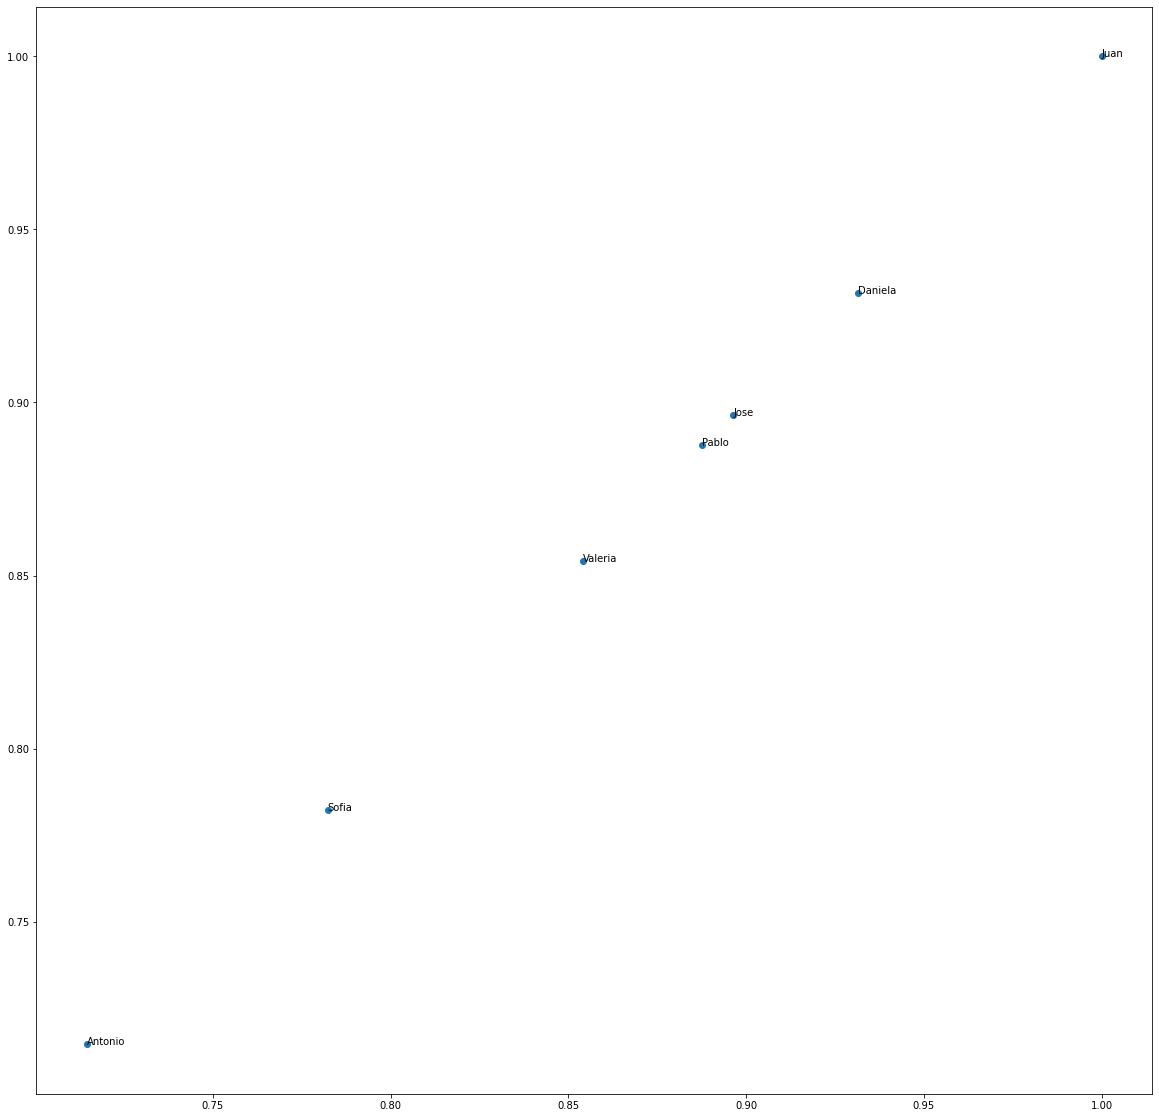

In [10]:
def cos_sim_all (a): 
  name1 = database.loc[database['nombre']== a].values #Obtener valores del nombre seleccionado y convertir a un arreglo
  name1 = np.delete(name1,0) # Borramos el nombre
  all_names = np.empty(0)
  for i in range(len(database['nombre'])):
    name2 = (database.loc[i].values)
    name2 = np.delete(name2,0) # Borramos el nombre
    cos_sim = np.dot(name1, name2)/(lng.norm(name1)*lng.norm(name2)) #Calcular la relacion de coseno entre A y B
    all_names = np.insert(all_names, len(all_names), [cos_sim])
  #print ('La relación coseno entre: ' + a + ' y ' + b)

  #Grafico
  fig,ax = plt.subplots()
  fig.set_figheight(20)
  fig.set_figwidth(20)
  ax.scatter(all_names, all_names)

  for i, name in enumerate(database['nombre']):
    print(i)
    ax.annotate (name, (all_names[i], all_names[i]))

def button_clicked2(b):
  cos_sim_all(dropdownName3.value);

button2 = widgets.Button( #Crear botón
    description='Click me',
    disabled= False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button2.on_click(button_clicked2)
button2